# Project: Analyzing CIA Factbook Data Using SQL

## Introduction

In this project, we'll work with data from the CIA World Factbook, a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like:

  *  population - The population as of 2015.
  *  population_growth - The annual population growth rate, as a percentage.
  *  area - The total land and water area.
  
We start with connect our database file **factbook.db** to the notebook.

In [1]:
#import sql3, pandas and connect to the databse.
import sqlite3
import pandas as pd
conn = sqlite3.connect("factbook.db")

#activates the cursor
cursor = conn.cursor()

## Overview of the Data

Let's take a look at the data we will work with.

In [3]:
sq1="SELECT * FROM sqlite_master WHERE type='table';"
data=pd.read_sql_query(sq1,conn)
data

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [4]:
sq2="SELECT * FROM facts limit 10;"
data=pd.read_sql_query(sq2,conn)
data

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46
5,6,ac,Antigua and Barbuda,442,442,0,92436,1.24,15.85,5.69,2.21
6,7,ar,Argentina,2780400,2736690,43710,43431886,0.93,16.64,7.33,0.00
7,8,am,Armenia,29743,28203,1540,3056382,0.15,13.61,9.34,5.80
8,9,as,Australia,7741220,7682300,58920,22751014,1.07,12.15,7.14,5.65
9,10,au,Austria,83871,82445,1426,8665550,0.55,9.41,9.42,5.56


## Summary Statistics

Here are the descriptions for some of the columns:

  *  name - The name of the country.
  *  area - The total land and sea area of the country.
  *  population - The country's population.
  *  population_growth- The country's population growth as a percentage.
  *  birth_rate - The country's birth rate, or the number of births a year per        1,000 people.
  *  death_rate - The country's death rate, or the number of death a year per        1,000   people.
  *  area- The country's total area (both land and water).
  *  area_land - The country's land area in square kilometers.
  *  area_water - The country's waterarea in square kilometers.

Let's start by calculating some summary statistics and look for any outlier countries.

In [5]:
sq3="SELECT MIN(population) min_pop, MAX(population) max_pop, MIN(population_growth) min_pop_grwth, MAX(population_growth) max_pop_grwth FROM facts;"
data=pd.read_sql_query(sq3,conn)
data

,min_pop,max_pop,min_pop_grwth,max_pop_grwth
0,0,7256490011,0.0,4.02


Quite weird we have countries with populations of 0 and 7.2 billion. Let's dig deeper into this. 

## Exploring Outliers

In [6]:
sq4="SELECT * FROM facts WHERE population == (SELECT MAX(population) FROM facts);"
data=pd.read_sql_query(sq4,conn)
data

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


In [7]:
sq5="SELECT * FROM facts WHERE population == (SELECT MIN(population) FROM facts);"
data=pd.read_sql_query(sq5,conn)
data

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


It seems that the table has a row for our planet with the population of 7.2 billion. And the 0 population row is for Antarctica that has no indigenous inhabitants. 

Let's proceed to calculating some averages values for our data.

## Exploring Average Population and Area

In [8]:
sq6="SELECT AVG(population) avg_population, AVG(area) avg_area FROM facts;"
data=pd.read_sql_query(sq6,conn)
data

,avg_population,avg_area
0,6.209493e+07,555093.546185


## Finding Densely Populated Countries

We can find the countries that have a population more than average and an area less than average in order to see what countries are densely populated.

In [14]:
sq7="SELECT * FROM FACTS WHERE POPULATION > (SELECT AVG(POPULATION) FROM FACTS) AND AREA < (SELECT AVG(AREA) FROM FACTS) order by population desc;"
data=pd.read_sql_query(sq7,conn)
data


,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,14,bg,Bangladesh,148460,130170,18290,168957745,1.60,21.14,5.61,0.46
1,85,ja,Japan,377915,364485,13430,126919659,0.16,7.93,9.51,0.00
2,138,rp,Philippines,300000,298170,1830,100998376,1.61,24.27,6.11,2.09
3,192,vm,Vietnam,331210,310070,21140,94348835,0.97,15.96,5.93,0.30
4,65,gm,Germany,357022,348672,8350,80854408,0.17,8.47,11.42,1.24
5,173,th,Thailand,513120,510890,2230,67976405,0.34,11.19,7.80,0.00
6,185,uk,United Kingdom,243610,241930,1680,64088222,0.54,12.17,9.35,2.54


[Text(0, 0, '0'),
 Text(0, 0, '20 mil'),
 Text(0, 0, '40 mil'),
 Text(0, 0, '60 mil'),
 Text(0, 0, '80 mil'),
 Text(0, 0, '100 mil'),
 Text(0, 0, '120 mil'),
 Text(0, 0, '140 mil'),
 Text(0, 0, '160mil'),
 Text(0, 0, '180 mil')]

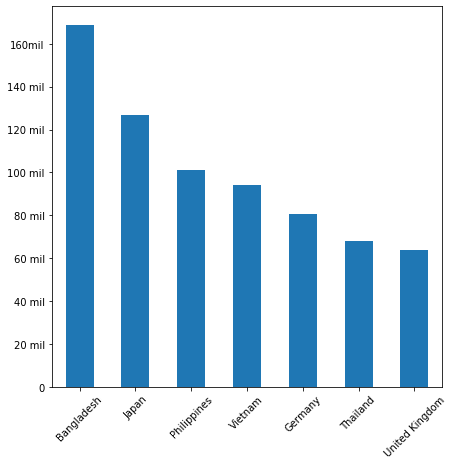

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(7,7))
ax1 = data["population"].plot.bar()
ax1.set_xticklabels(["Bangladesh", "Japan", "Philippines","Vietnam", "Germany", "Thailand", "United Kingdom"], rotation=45)
ax1.set_yticklabels(["0", "20 mil", "40 mil", "60 mil", "80 mil", "100 mil", "120 mil", "140 mil", "160mil", "180 mil"])


So the most densely populated countries are Bangladesh, Germany, Japan, Philippines, Thailand, United Kingdom and Vietnam. We can go further and explore the water to land ratios.

## Highest Ratios of Water to Land

In [28]:
sq8="SELECT * FROM FACTS WHERE area_water > area_land;"
data=pd.read_sql_query(sq8,conn)
data

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,228,io,British Indian Ocean Territory,54400,60,54340,NaN,NaN,NaN,NaN,NaN
1,247,vq,Virgin Islands,1910,346,1564,103574.0,0.59,10.31,8.54,7.67


In [33]:
sq9 = "SELECT name, CAST(area_water as float)/CAST(area_land as float) water_to_land_ratio FROM FACTS ORDER BY water_to_land_ratio desc limit 6;"
data=pd.read_sql_query(sq9,conn)
data

,name,water_to_land_ratio
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396


## Conclusion

During this project we explored the CIA factbook data using SQL, analyzed it, discovered to summary statistics, average values for land population, found the most densely populated countries and highest ratios of water to land.